In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [3]:
X = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [4]:
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


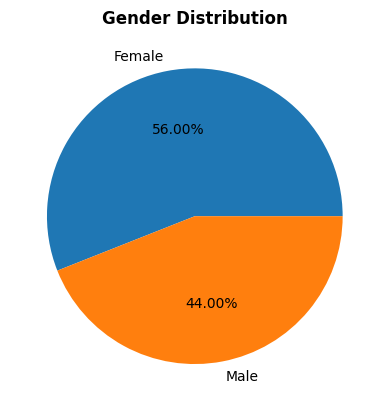

In [6]:
gender_count = X['Gender'].value_counts()
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%')
plt.show()

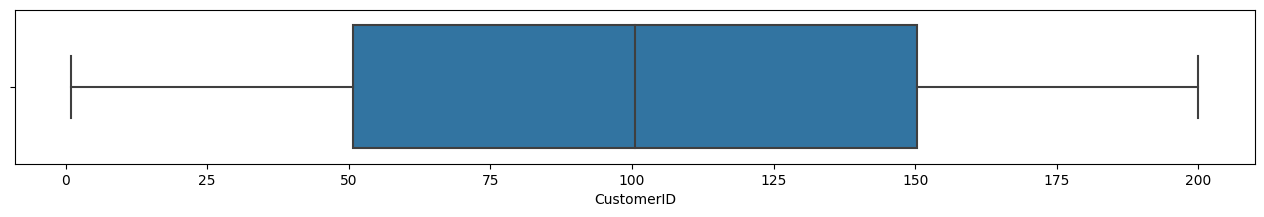

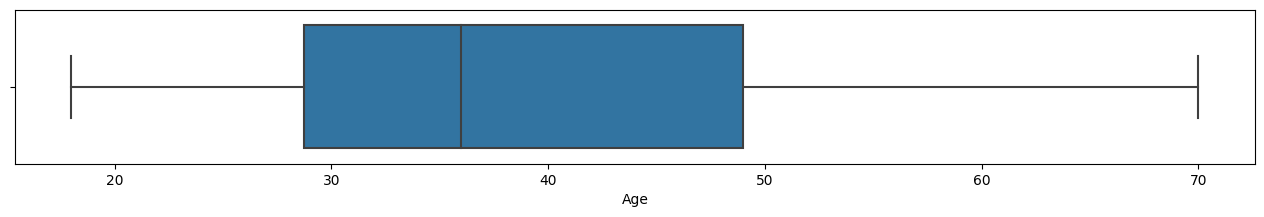

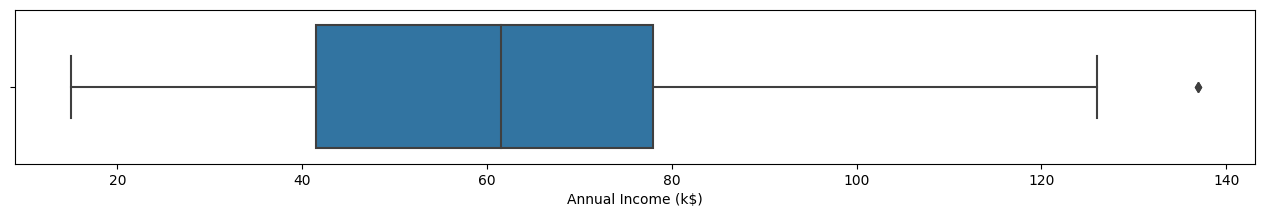

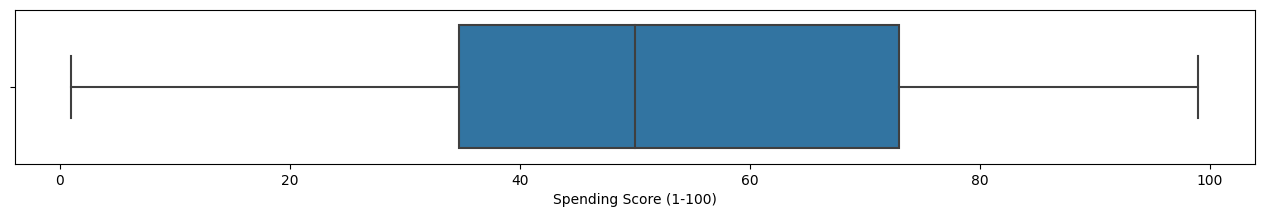

In [7]:
for col in X.describe().columns:
    plt.figure(figsize=(16,2))
    sns.boxplot(data=X, x=col)
    plt.show()

In [8]:
dummies = pd.get_dummies(X['Gender'],dtype=int)
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [9]:
X = pd.concat([X,dummies], axis = 'columns')

In [10]:
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [11]:
X = X.drop('Gender', axis=1)

In [12]:
X.isnull().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Female                    0
Male                      0
dtype: int64

In [13]:
X.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.560000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000,1.000000


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


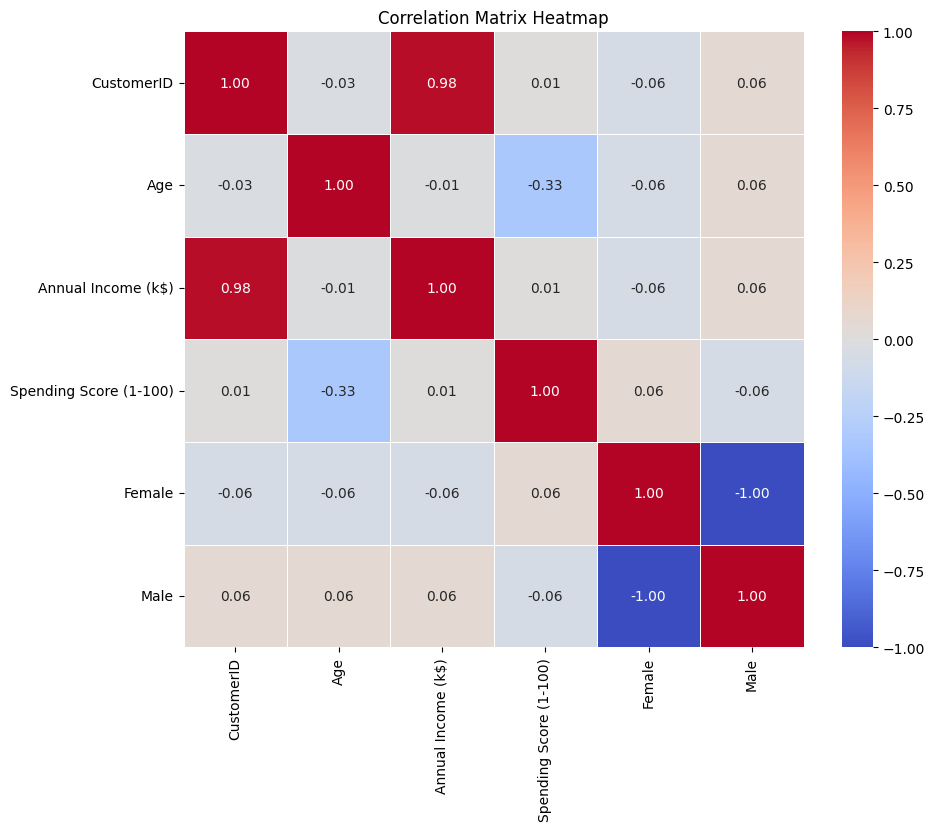

In [16]:
corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
X = X.drop(['CustomerID','Female','Male'], axis=1)

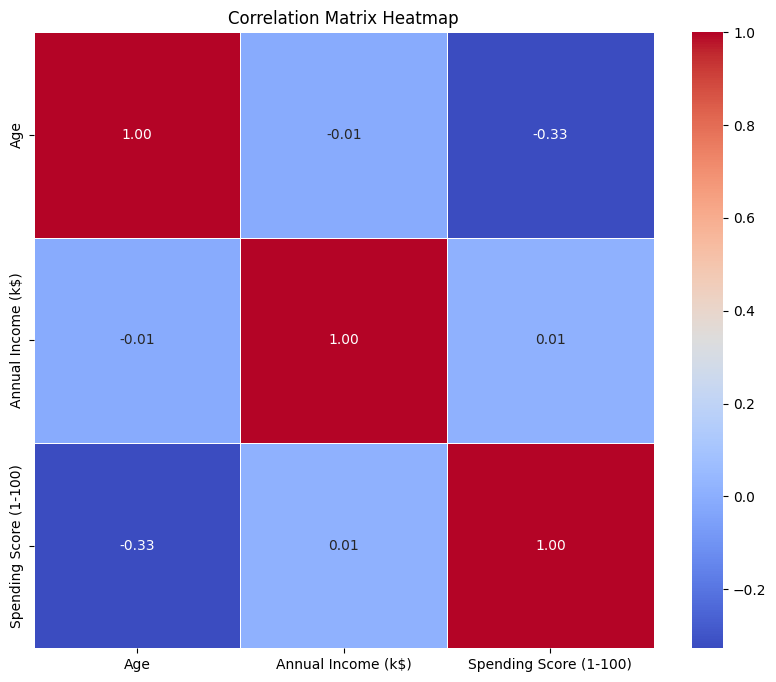

In [18]:
corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

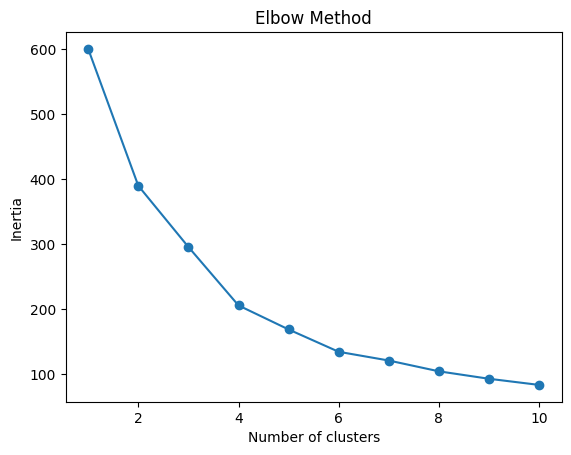

In [22]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [31]:
optimal_n_clusters = 6

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [32]:
X['Cluster'] = kmeans.labels_

In [37]:
import plotly.graph_objs as go

traces = []
for cluster in range(6):
    cluster_data = X[X['Cluster'] == cluster]
    trace = go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Annual Income (k$)'],
        z=cluster_data['Spending Score (1-100)'],
        mode='markers',
        marker=dict(
            size=5,
            color=cluster,
            opacity=0.8,
            colorscale='Rainbow'
        ),
        name=f'Cluster {cluster}'
    )
    traces.append(trace)

layout = go.Layout(
    title='Clustering of Customers',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)')
    )
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [ ]:
git init
git add .
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Tr1ck-5t3r/PRODIGY_ML_02.git
git push -u origin main